Welcome to your DataCamp project audition! This notebook must be filled out and vetted before a contract can be signed and you can start creating your project.

The first step is forking the repository in which this notebook lives. After that, there are two parts to be completed in this notebook:

- **Project information**:  The title of the project, a project description, etc.

- **Project introduction**: The three first text and code cells that will form the introduction of your project.

When complete, please email the link to your forked repo to projects@datacamp.com with the email subject line _DataCamp project audition_. If you have any questions, please reach out to projects@datacamp.com.

# Project information

**Project title**: Explore FIFA 18 Players through Clustering.

**Name:** Shaumik Daityari.

**Email address associated with your DataCamp account:** sdaityari@gmail.com.

**Project description**: 
FIFA 18 is one among a series of football simulation games developed by Electronic Arts. It contains a comprehensive catalog of all professional players that play the actual game. In this project, you will explore various attributes of players and arrange them into logical groups based on their in-game avatars.

You will use the FIFA 18 players dataset for this project. The dataset contains player information from  FIFA 18. It contains three types of data for each player:

- Player characterisitcs like club, height, weight, preferred position
- In game football characteristics like dribbling and shooting ability
- In game characterisitics and traits like leadership quality and ability to hit powerful free kicks

To complete this course, knowledge on two techniques are recommended: handling data using the Pandas module and k-means clustering through SciPy. The courses [Intermiediate Python for Data Science](https://www.datacamp.com/courses/intermediate-python-for-data-science) and [Clustering Methods with SciPy](https://www.datacamp.com/courses/clustering-methods-with-scipy) would get you started on these concepts. 

Note: Interchanged the ideal position of paragraphs 2 and 3.

# Project introduction

***Note: nothing needs to be filled out in this cell. It is simply setting up the template cells below.***

The final output of a DataCamp project looks like a blog post: pairs of text and code cells that tell a story about data. The text is written from the perspective of the data analyst and *not* from the perspective of an instructor on DataCamp. So, for this blog post intro, all you need to do is pretend like you're writing a blog post -- forget the part about instructors and students.

Below you'll see the structure of a DataCamp project: a series of "tasks" where each task consists of a title, a **single** text cell, and a **single** code cell. There are 8-12 tasks in a project and each task can have up to 10 lines of code. What you need to do:
1. Read through the template structure.
2. As best you can, divide your project as it is currently visualized in your mind into tasks.
3. Fill out the template structure for the first three tasks of your project.

As you are completing each task, you may wish to consult the project notebook format in our [documentation](https://instructor-support.datacamp.com/projects/datacamp-projects-jupyter-notebook). Only the `@context` and `@solution` cells are relevant to this audition.

## 1. Import the data

FIFA 18 is a football simulation game that is published by Electronic Arts. While the overall statistic of a player signifies how good he is in the game, we will also explore the potential statistic and at what age, a player will likely hit their peak. Every game in the FIFA series typically has two game modes that have been common for a long time --- kick off, which is an instantaneous match between two teams, and career mode, where the player takes control of a team for a number of years. In the career mode, players develop and their statistics improve --- with younger players seeing a steeper jump in statistics over time. This is where the potential statistic comes into play.

![FIFA 18]('img/fifa18.PNG')

This analysis is going to involve a deep dive into a few questions that may have already struck you? Which attributes are essential for players at various positions in the field? At what age do players perform the best? How do wages and transfer values vary by position and age?

The first step involves importing the CSV file of player attributes into a Pandas data frame and display the first few rows.

In [1]:
# Import the Pandas library as pd
import pandas as pd

# Use the read_csv() function of Pandas to create a data frame, fifa
fifa = pd.read_csv('datasets/FIFA18.csv')

fifa.head()

F:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (20,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,2228,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,2154,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,2100,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,€510K,2291,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,€230K,1493,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2.  Explore and visualize data

Next, we will explore the dataset that we just imported. Let us explore the dataset and visualize some data. First, we will see the number of rows and columns that the data contains using the `shape` attribute of the dataframe.

Further, we will look at the distribution of players with respect to their Overall and Potential attributes. If you think about it, the potential attribute of a player can only be higher than or equal to their current overall attribute. Hence, the distribution of the potential attribute should be similar to the overall attribute, but with a shift towards the right along the x axis.

The dimensions of the data are: (17981, 72)


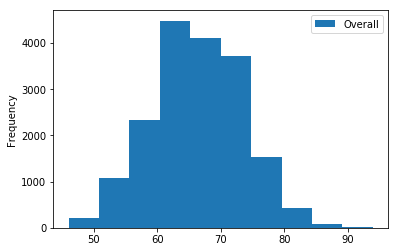

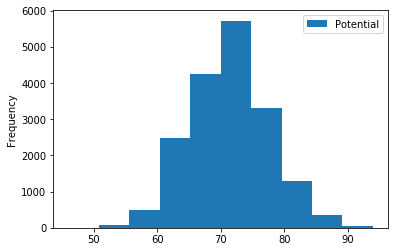

In [2]:
# Check the number of rows and columns
print('The dimensions of the data are:', fifa.shape)

# Enable matplotlib to show inline plots
%matplotlib inline

# Check the distribution of overall rating
fifa.plot(y = 'Overall', kind = 'hist')

# Check the distribution of overall rating
fifa.plot(y = 'Potential', kind = 'hist')

## 3. Convert Player Positions

Next, we will create a Pandas column to store the position that a player plays in. We already have a column, "Preferred Position" --- but it contains one or more values separated by spaces. We will use a lambda function to extract only the first preferred position. (To do: We can modify this to select the preferred position where the overall of a player is the highest)

Once we have mapped each player to a single position, let us check the number of players in each position by using the `.value_counts()` method of Pandas.

In [3]:
# Check the distribution of player positions
fifa['position'] = fifa['Preferred Positions'].apply(lambda positions: positions[:positions.find(' ')])

# Print the distribution of player positions
fifa['position'].value_counts()

CB     2705
ST     2277
GK     2029
CM     1977
CDM    1396
RM     1350
LM     1326
LB     1309
RB     1195
CAM    1125
RW      429
LW      427
CF      205
LWB     120
RWB     111
Name: position, dtype: int64

*Stop here! Only the three first tasks. :)*

In [4]:
# Future code
# def convert_value_to_int(value):
#     if len(value) < 3:
#         return 0

#     value = value[1:]
#     if value[-1:] == 'M':
#         return float(value[:-1]) * 1000000
#     else:
#         return float(value[:-1]) * 1000

# fifa['value_int'] = fifa['Value'].apply(convert_value_to_int)